In [3]:
import pandas as pd

# load excel file
df = pd.read_excel("movies.xlsx")
df.head()

,title
0,The Age of Adaline
1,Black Christmas
2,London
3,Twisted
4,Friends with Kids


In [7]:
print('Number of rows:', df.size)

Number of rows: 150


In [8]:
# initialize omdb
import requests
import time

OMDB_API_KEY = "c0c5b16c"

In [9]:
# function to get movie data from omdp
def get_omdb_data(title):
    # request data for movie title
    url = f"http://www.omdbapi.com/?t={title}&apikey={OMDB_API_KEY}"
    response = requests.get(url)
    data = response.json()
    
    # return movie data
    if data.get("Response") == "True":
        return {
            "Title": data.get("Title"),
            "Year": data.get("Year"),
            "Rated": data.get("Rated"),
            "Runtime": data.get("Runtime"),
            "IMDB_Rating": data.get("imdbRating"),
            "IMDB_Votes": data.get("imdbVotes"),
            "Box_Office": data.get("BoxOffice"),
            "Released": data.get("Released"),
            "Genre": data.get("Genre"),
            "Director": data.get("Director"),
            "Writer": data.get("Writer"),
            "Actors": data.get("Actors"),
            "Plot": data.get("Plot"),
            "Language": data.get("Language"),
            "Country": data.get("Country"),
            "Awards": data.get("Awards"),
            "Poster": data.get("Poster"),
            "Metascore": data.get("Metascore"),
            "Ratings": data.get("Ratings")
        }
    else:
        return None

In [10]:
# get_omdp_data test
get_omdb_data("inception")

{'Title': 'Inception',
 'Year': '2010',
 'Rated': 'PG-13',
 'Runtime': '148 min',
 'IMDB_Rating': '8.8',
 'IMDB_Votes': '2,645,456',
 'Box_Office': '$292,587,330',
 'Released': '16 Jul 2010',
 'Genre': 'Action, Adventure, Sci-Fi',
 'Director': 'Christopher Nolan',
 'Writer': 'Christopher Nolan',
 'Actors': 'Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page',
 'Plot': 'A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O., but his tragic past may doom the project and his team to disaster.',
 'Language': 'English, Japanese, French',
 'Country': 'United States, United Kingdom',
 'Awards': 'Won 4 Oscars. 159 wins & 220 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjAxMzY3NjcxNF5BMl5BanBnXkFtZTcwNTI5OTM0Mw@@._V1_SX300.jpg',
 'Metascore': '74',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.8/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '87%'},
  

In [11]:
# fetch omdb data for all movies
omdb_data = []
for i, title in enumerate(df["title"]):
    print(f"Getting data of movie {i+1}/{len(df)}: {title}")
    data = get_omdb_data(title)
    if data:
        omdb_data.append(data)
    # set delays to avoid API rate limits
    time.sleep(1)

# convert list to dataframe
omdb_df = pd.DataFrame(omdb_data)

# to avoid case sensitivity in merge
df["Title"] = df["title"].str.title()
df = df.drop(columns=["title"])
omdb_df["Title"] = omdb_df["Title"].str.title()

# merge with original df
movies = df.merge(omdb_df, on="Title", how="left")

Getting data of movie 1/150: The Age of Adaline
Getting data of movie 2/150: Black Christmas
Getting data of movie 3/150: London
Getting data of movie 4/150: Twisted
Getting data of movie 5/150: Friends with Kids
Getting data of movie 6/150: Ken Park
Getting data of movie 7/150: Girls Trip
Getting data of movie 8/150: The Art of the Steal
Getting data of movie 9/150: Macbeth
Getting data of movie 10/150: Fatherhood
Getting data of movie 11/150: London Has Fallen
Getting data of movie 12/150: Anthropoid
Getting data of movie 13/150: Me, Myself & Irene
Getting data of movie 14/150: The Last Face
Getting data of movie 15/150: The Fly
Getting data of movie 16/150: A Quiet Place
Getting data of movie 17/150: God's Not Dead 2
Getting data of movie 18/150: Marvel One-Shot: Agent Carter
Getting data of movie 19/150: Hamlet 2
Getting data of movie 20/150: Where the Truth Lies
Getting data of movie 21/150: Ashby
Getting data of movie 22/150: Jaws
Getting data of movie 23/150: Ricochet
Getting da

In [12]:
movies.head()

,Title,Year,Rated,Runtime,IMDB_Rating,IMDB_Votes,Box_Office,Released,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Metascore,Ratings
0,The Age Of Adaline,2015,PG-13,112 min,7.2,"212,877","$42,629,776",24 Apr 2015,"Drama, Fantasy, Romance",Lee Toland Krieger,"J. Mills Goodloe, Salvador Paskowitz","Blake Lively, Michiel Huisman, Harrison Ford","A young woman, born at the turn of the 20th ce...","English, Portuguese, Italian","United States, Canada",1 win & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTAzMT...,51,"[{'Source': 'Internet Movie Database', 'Value'..."
1,Black Christmas,1974,R,98 min,7.1,"50,352",N/A,20 Dec 1974,"Horror, Mystery, Thriller",Bob Clark,Roy Moore,"Olivia Hussey, Keir Dullea, Margot Kidder","During their Christmas break, a group of soror...","English, Latin",Canada,3 wins & 2 nominations,https://m.media-amazon.com/images/M/MV5BZjdiMz...,65,"[{'Source': 'Internet Movie Database', 'Value'..."
2,London,2005,R,92 min,6.3,"25,119","$20,361",03 Jul 2021,"Drama, Romance",Hunter Richards,Hunter Richards,"Jessica Biel, Chris Evans, Jason Statham","At a drug laden party in a New York loft, a yo...",English,"United Kingdom, United States",1 win & 1 nomination total,https://m.media-amazon.com/images/M/MV5BMTc5Mz...,24,"[{'Source': 'Internet Movie Database', 'Value'..."
3,Twisted,2004,R,97 min,5.3,"23,599","$25,198,598",27 Feb 2004,"Crime, Drama, Mystery",Philip Kaufman,Sarah Thorp,"Ashley Judd, Samuel L. Jackson, Andy Garcia","Jessica, whose father killed her mother and co...","English, Italian, Spanish","United States, Germany",1 win,https://m.media-amazon.com/images/M/MV5BMGJhNj...,26,"[{'Source': 'Internet Movie Database', 'Value'..."
4,Friends With Kids,2011,R,107 min,6.1,"43,369","$7,251,073",16 Mar 2012,"Comedy, Drama, Romance",Jennifer Westfeldt,Jennifer Westfeldt,"Jennifer Westfeldt, Adam Scott, Maya Rudolph",Two best friends decide to have a child togeth...,English,United States,2 nominations,https://m.media-amazon.com/images/M/MV5BMjIyMD...,55,"[{'Source': 'Internet Movie Database', 'Value'..."


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        150 non-null    object
 1   Year         149 non-null    object
 2   Rated        149 non-null    object
 3   Runtime      149 non-null    object
 4   IMDB_Rating  149 non-null    object
 5   IMDB_Votes   149 non-null    object
 6   Box_Office   149 non-null    object
 7   Released     149 non-null    object
 8   Genre        149 non-null    object
 9   Director     149 non-null    object
 10  Writer       149 non-null    object
 11  Actors       149 non-null    object
 12  Plot         149 non-null    object
 13  Language     149 non-null    object
 14  Country      149 non-null    object
 15  Awards       149 non-null    object
 16  Poster       149 non-null    object
 17  Metascore    149 non-null    object
 18  Ratings      149 non-null    object
dtypes: object(19)
memory usage: 2

In [14]:
# save omdb data in file
movies.to_excel("omdb-data.xlsx", index=False)

In [121]:
movies_df = pd.read_excel("omdb-data.xlsx")

In [122]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        150 non-null    object 
 1   Year         149 non-null    float64
 2   Rated        146 non-null    object 
 3   Runtime      149 non-null    object 
 4   IMDB_Rating  149 non-null    float64
 5   IMDB_Votes   149 non-null    object 
 6   Box_Office   114 non-null    object 
 7   Released     149 non-null    object 
 8   Genre        149 non-null    object 
 9   Director     149 non-null    object 
 10  Writer       149 non-null    object 
 11  Actors       149 non-null    object 
 12  Plot         149 non-null    object 
 13  Language     148 non-null    object 
 14  Country      149 non-null    object 
 15  Awards       128 non-null    object 
 16  Poster       149 non-null    object 
 17  Metascore    131 non-null    float64
 18  Ratings      149 non-null    object 
dtypes: float

In [123]:
movies_df.isnull().sum()

Title           0
Year            1
Rated           4
Runtime         1
IMDB_Rating     1
IMDB_Votes      1
Box_Office     36
Released        1
Genre           1
Director        1
Writer          1
Actors          1
Plot            1
Language        2
Country         1
Awards         22
Poster          1
Metascore      19
Ratings         1
dtype: int64

In [124]:
# standardize column names
movies_df.columns = movies_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [125]:
# unique values in the rated column
movies_df['rated'].unique()

array(['PG-13', 'R', 'Not Rated', 'PG', 'Unrated', nan, 'G', 'TV-G',
       'TV-MA', 'TV-14', 'Approved', 'TV-PG', 'NC-17'], dtype=object)

In [126]:
# fill missing values
movies_df['rated'] = movies_df['rated'].replace('Not Rated', 'Unrated')
movies_df['rated'] = movies_df['rated'].fillna('Not Rated')

In [127]:
movies_df['awards'] = movies_df['awards'].fillna('No wins.')

In [128]:
movies_df['metascore'] = movies_df['metascore'].fillna(-1)

In [129]:
movies_df.isnull().sum()

title           0
year            1
rated           0
runtime         1
imdb_rating     1
imdb_votes      1
box_office     36
released        1
genre           1
director        1
writer          1
actors          1
plot            1
language        2
country         1
awards          0
poster          1
metascore       0
ratings         1
dtype: int64

In [130]:
movies_df = movies_df.dropna(subset=movies_df.columns.difference(['box_office']))

In [131]:
movies_df.isnull().sum()

title           0
year            0
rated           0
runtime         0
imdb_rating     0
imdb_votes      0
box_office     34
released        0
genre           0
director        0
writer          0
actors          0
plot            0
language        0
country         0
awards          0
poster          0
metascore       0
ratings         0
dtype: int64

In [132]:
# correct datatypes
movies_df['year'] = movies_df['year'].astype(int)
movies_df['runtime'] = movies_df['runtime'].str.extract('(\d+)').astype(int)
movies_df['imdb_votes'] = movies_df['imdb_votes'].str.replace(',', '').astype(int)
movies_df['metascore'] = movies_df['metascore'].astype(int)

In [133]:
# find movies where box office earnings are not available
boxoffice_na = movies_df[movies_df['box_office'].isnull()]
box_office_na_count = boxoffice_na.shape[0]
print(f'movies where box office earnings are not available: {box_office_na_count}')

movies where box office earnings are not available: 34


In [134]:
# find movies where released before 2006
before06 = movies_df[movies_df['year'] < 2006]
before06_count = before06.shape[0]
print(f'movies released before 2006: {before06_count}')

movies released before 2006: 55


In [135]:
# movies with box office earnings
movies_df_bo = movies_df.dropna(subset=['box_office'])
# movies released after 2006
movies_df_06 = movies_df[movies_df['year'] < 2006]

In [136]:
movies_df_bo_06 = movies_df_bo[movies_df_bo['year'] < 2006]

In [137]:
movies_df['box_office'] = movies_df['box_office'].fillna('No Info')

In [138]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 149
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        148 non-null    object 
 1   year         148 non-null    int64  
 2   rated        148 non-null    object 
 3   runtime      148 non-null    int64  
 4   imdb_rating  148 non-null    float64
 5   imdb_votes   148 non-null    int64  
 6   box_office   148 non-null    object 
 7   released     148 non-null    object 
 8   genre        148 non-null    object 
 9   director     148 non-null    object 
 10  writer       148 non-null    object 
 11  actors       148 non-null    object 
 12  plot         148 non-null    object 
 13  language     148 non-null    object 
 14  country      148 non-null    object 
 15  awards       148 non-null    object 
 16  poster       148 non-null    object 
 17  metascore    148 non-null    int64  
 18  ratings      148 non-null    object 
dtypes: float64(1)

In [139]:
movies_df_bo_06.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 2 to 143
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        52 non-null     object 
 1   year         52 non-null     int64  
 2   rated        52 non-null     object 
 3   runtime      52 non-null     int64  
 4   imdb_rating  52 non-null     float64
 5   imdb_votes   52 non-null     int64  
 6   box_office   52 non-null     object 
 7   released     52 non-null     object 
 8   genre        52 non-null     object 
 9   director     52 non-null     object 
 10  writer       52 non-null     object 
 11  actors       52 non-null     object 
 12  plot         52 non-null     object 
 13  language     52 non-null     object 
 14  country      52 non-null     object 
 15  awards       52 non-null     object 
 16  poster       52 non-null     object 
 17  metascore    52 non-null     int64  
 18  ratings      52 non-null     object 
dtypes: float64(1),

In [140]:
movies_df_bo_06.head()

,title,year,rated,runtime,imdb_rating,imdb_votes,box_office,released,genre,director,writer,actors,plot,language,country,awards,poster,metascore,ratings
2,London,2005,R,92,6.3,25119,"$20,361",03 Jul 2021,"Drama, Romance",Hunter Richards,Hunter Richards,"Jessica Biel, Chris Evans, Jason Statham","At a drug laden party in a New York loft, a yo...",English,"United Kingdom, United States",1 win & 1 nomination total,https://m.media-amazon.com/images/M/MV5BMTc5Mz...,24,"[{'Source': 'Internet Movie Database', 'Value'..."
3,Twisted,2004,R,97,5.3,23599,"$25,198,598",27 Feb 2004,"Crime, Drama, Mystery",Philip Kaufman,Sarah Thorp,"Ashley Judd, Samuel L. Jackson, Andy Garcia","Jessica, whose father killed her mother and co...","English, Italian, Spanish","United States, Germany",1 win,https://m.media-amazon.com/images/M/MV5BMGJhNj...,26,"[{'Source': 'Internet Movie Database', 'Value'..."
12,"Me, Myself & Irene",2000,R,116,6.6,255879,"$90,570,999",23 Jun 2000,Comedy,"Bobby Farrelly, Peter Farrelly","Peter Farrelly, Mike Cerrone, Bobby Farrelly","Jim Carrey, Renée Zellweger, Anthony Anderson",A nice-guy cop with Dissociative Identity Diso...,"English, German",United States,2 wins & 4 nominations total,https://m.media-amazon.com/images/M/MV5BZjEzYT...,49,"[{'Source': 'Internet Movie Database', 'Value'..."
14,The Fly,1986,R,96,7.6,211745,"$40,456,565",15 Aug 1986,"Drama, Horror, Sci-Fi",David Cronenberg,"George Langelaan, Charles Edward Pogue, David ...","Jeff Goldblum, Geena Davis, John Getz",A brilliant but eccentric scientist begins to ...,English,"United States, Canada",Won 1 Oscar. 7 wins & 10 nominations total,https://m.media-amazon.com/images/M/MV5BOTBlNT...,81,"[{'Source': 'Internet Movie Database', 'Value'..."
19,Where The Truth Lies,2005,Unrated,107,6.4,18962,"$872,142",07 Oct 2005,"Crime, Mystery, Thriller",Atom Egoyan,"Atom Egoyan, Rupert Holmes","Kevin Bacon, Colin Firth, Alison Lohman","Karen O'Connor, a young journalist known for h...","English, Cantonese",Canada,2 wins & 10 nominations,https://m.media-amazon.com/images/M/MV5BMTI2Nz...,47,"[{'Source': 'Internet Movie Database', 'Value'..."


In [142]:
# turn box office values to int format
movies_df_bo = movies_df_bo.copy()
movies_df_bo.loc[:, 'box_office'] = movies_df_bo['box_office'].replace({'\$': '', ',': ''}, regex=True).astype(int)
movies_df_bo_06 = movies_df_bo_06.copy()
movies_df_bo_06['box_office'] = movies_df_bo_06['box_office'].replace({'\$': '', ',': ''}, regex=True).astype(int)

In [72]:
# initialize pytrends
# from pytrends.request import TrendReq
# from datetime import datetime, timedelta

# pytrends = TrendReq(hl='en-US', tz=360)

In [73]:
# initialize trendspy
import requests
import time
from trendspy import Trends

tr = Trends(request_delay=10.0)

In [75]:
# function to get data from google trends
def get_googletrends_data(tr, movie_title, release_date):
    # convert release date to datetime format
    release_date = datetime.strptime(release_date, "%d %b %Y")
    release_date = release_date.strftime("%Y-%m-%d")
    
    # timeframe string
    timeframe = f'{release_date} 1-y'
    
    # get number of movie searches
    interest_data = tr.interest_over_time(movie_title, timeframe=timeframe)
    
    if not interest_data.empty:
        # get total number of searches in timeframe
        total_searches = interest_data[movie_title].sum()
        return total_searches
    else:
        return 0

In [62]:
# List to store the results
search_counts = []

# Iterate over DataFrame rows with index
for index, row in movies_df_cleaned.iterrows():
    print(f"Processing movie {index + 1}/{len(movies_df_cleaned)}: {row['Title']}")
    search_count = get_googletrends_data(tr, row['Title'], row['Released'])
    if search_count:
        search_counts.append(search_count)
        print(search_count)

# Assign the results to the DataFrame
movies_df_cleaned['Search_Count'] = search_counts

Processing movie 3/52: London



HTTPError: 429 Client Error: unknown for url: https://trends.google.com/trends/api/widgetdata/multiline?req=%7B%22time%22%3A+%222020-07-02+2021-07-03%22%2C+%22resolution%22%3A+%22WEEK%22%2C+%22locale%22%3A+%22en-US%22%2C+%22comparisonItem%22%3A+%5B%7B%22geo%22%3A+%7B%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22London%22%7D%5D%7D%7D%5D%2C+%22requestOptions%22%3A+%7B%22property%22%3A+%22%22%2C+%22backend%22%3A+%22IZG%22%2C+%22category%22%3A+0%7D%2C+%22userConfig%22%3A+%7B%22userType%22%3A+%22USER_TYPE_EMBED_OVER_QUOTA%22%7D%7D&token=APP6_UEAAAAAZ7X0Rnw5slQ9RhMa8w7L3xwlFpdYtwz_&hl=en&tz=360

In [147]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 0 to 149
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        148 non-null    object 
 1   year         148 non-null    int64  
 2   rated        148 non-null    object 
 3   runtime      148 non-null    int64  
 4   imdb_rating  148 non-null    float64
 5   imdb_votes   148 non-null    int64  
 6   box_office   148 non-null    object 
 7   released     148 non-null    object 
 8   genre        148 non-null    object 
 9   director     148 non-null    object 
 10  writer       148 non-null    object 
 11  actors       148 non-null    object 
 12  plot         148 non-null    object 
 13  language     148 non-null    object 
 14  country      148 non-null    object 
 15  awards       148 non-null    object 
 16  poster       148 non-null    object 
 17  metascore    148 non-null    int64  
 18  ratings      148 non-null    object 
dtypes: float64(1)

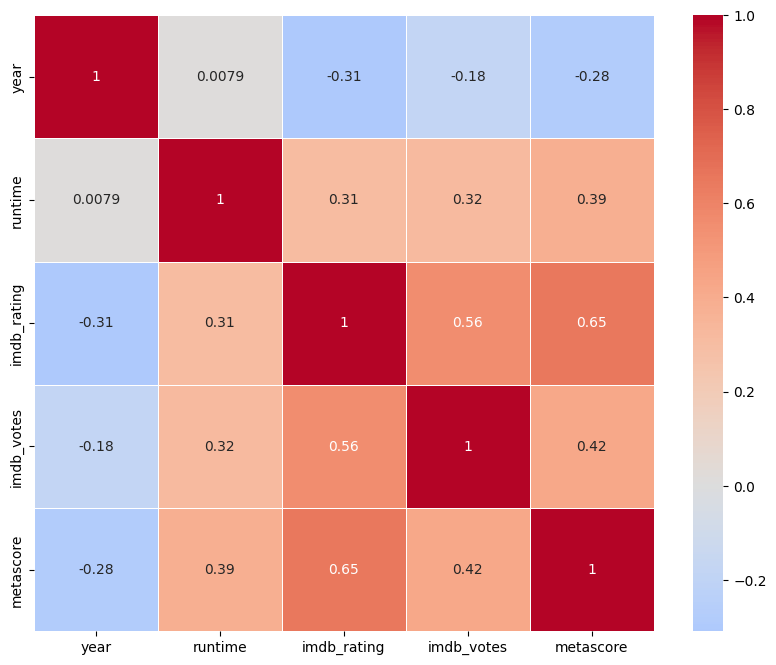

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr_matrix = movies_df.corr(numeric_only=True)

# set up the matplotlib figure
plt.figure(figsize=(10, 8))

# generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# display the plot
plt.show()

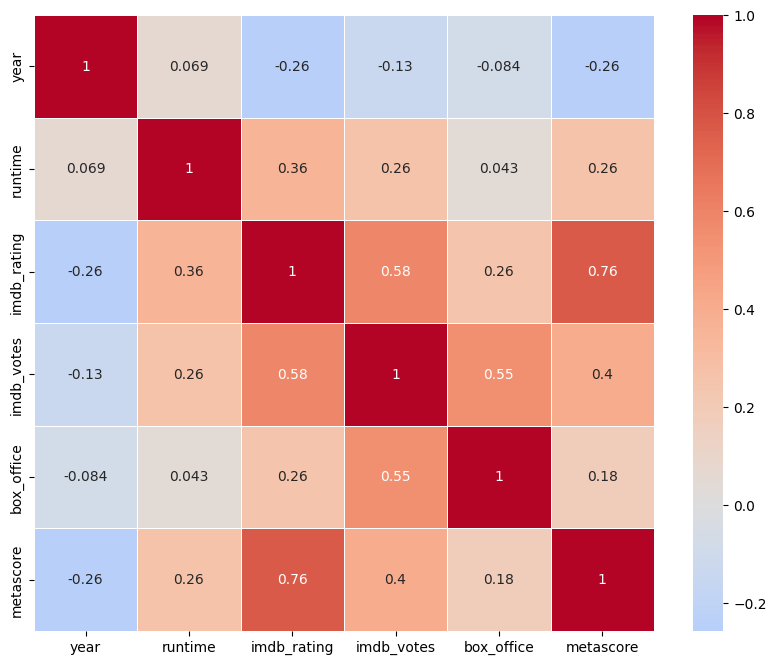

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr_matrix = movies_df_bo.corr(numeric_only=True)

# set up the matplotlib figure
plt.figure(figsize=(10, 8))

# generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# display the plot
plt.show()

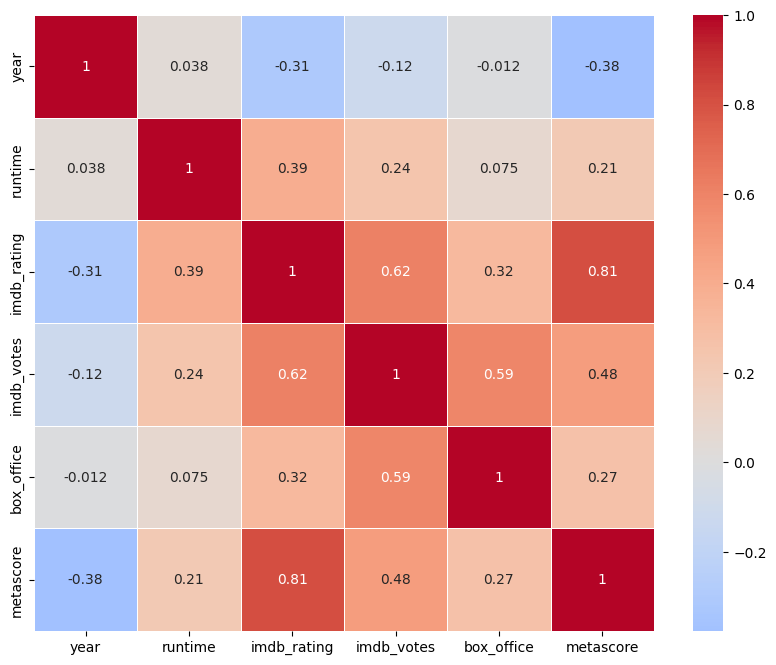

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr_matrix = movies_df_bo_06.corr(numeric_only=True)

# set up the matplotlib figure
plt.figure(figsize=(10, 8))

# generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# display the plot
plt.show()